# Effective depth of the sail of a surface drifter

Assumptions:
- Buoy is in a surface current along the x-axis, sail is not.  (Can always reach this with translation and rotation.)
- surcace current $v_0$
- buoy drag: $C_d^B \cdot A^B$
- sail drag: $C_d^S \cdot A^S$
- no drag on wire
- in equilibrium: buoy velocity equals sail velocity $v^B = v^S = V$

Forces
- drag
    - $F_d^B = \frac{\rho\,C_d^B\,A^B\,(V - v_0)^2}{2}$
    - $F_d^S = \frac{\rho\,C_d^S\,A^S\,V^2}{2}$
    - $F_g^S = m^S\cdot g$

Force balances:
- horizontally: drag on buoy equals drag on sail $F_d^B = F_d^S$
- vertically / 2d: $\alpha = \arctan(F_d^S / F_g^S)$ sets the inclination of the wire
- resulting depth $z = \cos(\alpha) \cdot L_{wire}$

Solve for resulting velocity (as function of drags and surface velocities):

$$F_d^B = F_d^S$$
$$C_d^B\,A^B\,(V-v_0)^2 = C_d^S\,A^S\,V^2$$
$$\sqrt{C_d^B\,A^B}\,(v_0 - V) = \sqrt{C_d^S\,A^S}\,V$$
(sign because $v_0 > V$)
$$V = \frac{\sqrt{C_d^B\,A^B}}{\sqrt{C_d^B\,A^B} + \sqrt{C_d^S\,A^S}} \, v_0$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
# parameters
C_d_S = 2  # dimless, for a plate perpendicular to 2d flow
A_S = 0.5 * 0.6  # m2
m_S = 0.5  # kg

C_d_B = 0.5  # dimless, sphere (I know...)
A_B = np.pi * 0.1 ** 2  # m2

wire_length = 3  # m
water_density = 1000  # kg/m3
g = 9.81

In [3]:
drag_ratio = (C_d_B * A_B) / (C_d_S * A_S)
drag_ratio

0.026179938779914945

In [4]:
def calc_V_resulting(v_0=0, C_d_B=1, C_d_S=1, A_B=1, A_S=1):
    d_B = (C_d_B * A_B) ** 0.5
    d_S = (C_d_S * A_S) ** 0.5
    return d_B / (d_B + d_S) * v_0

In [5]:
v_0 = pd.Series(np.linspace(0, 3, 101), name="v_0")
v_0

0      0.00
1      0.03
2      0.06
3      0.09
4      0.12
       ... 
96     2.88
97     2.91
98     2.94
99     2.97
100    3.00
Name: v_0, Length: 101, dtype: float64

In [6]:
V_resulting = calc_V_resulting(v_0 = v_0, C_d_B=C_d_B, C_d_S=C_d_S, A_B=A_B, A_S=A_S)
V_resulting

0      0.000000
1      0.004178
2      0.008356
3      0.012534
4      0.016712
         ...   
96     0.401093
97     0.405271
98     0.409449
99     0.413627
100    0.417805
Name: v_0, Length: 101, dtype: float64

In [7]:
def calc_drag_force(rho=1, C_d=1, A=1, v=0):
    return 0.5 * C_d * rho * A * v ** 2

In [8]:
drag_sail = calc_drag_force(rho=water_density, C_d=C_d_S, A=A_S, v=V_resulting)
drag_sail

0       0.000000
1       0.005237
2       0.020947
3       0.047131
4       0.083789
         ...    
96     48.262576
97     49.273283
98     50.294464
99     51.326118
100    52.368246
Name: v_0, Length: 101, dtype: float64

In [9]:
grav_force_sail = g * m_S
grav_force_sail

4.905

In [10]:
angle = np.rad2deg(np.arctan(drag_sail / grav_force_sail))
angle

0       0.000000
1       0.061172
2       0.244686
3       0.550530
4       0.978654
         ...    
96     84.196867
97     84.315115
98     84.429807
99     84.541085
100    84.649081
Name: v_0, Length: 101, dtype: float64

In [11]:
depth = wire_length * np.cos(np.deg2rad(angle))
depth

0      3.000000
1      2.999998
2      2.999973
3      2.999862
4      2.999562
         ...   
96     0.303332
97     0.297172
98     0.291195
99     0.285396
100    0.279766
Name: v_0, Length: 101, dtype: float64

In [12]:
df = pd.DataFrame({
    "v_0": v_0,
    "V_resulting": V_resulting,
    "drag_sail": drag_sail,
    "angle": angle,
    "depth": -depth
}).set_index("v_0")

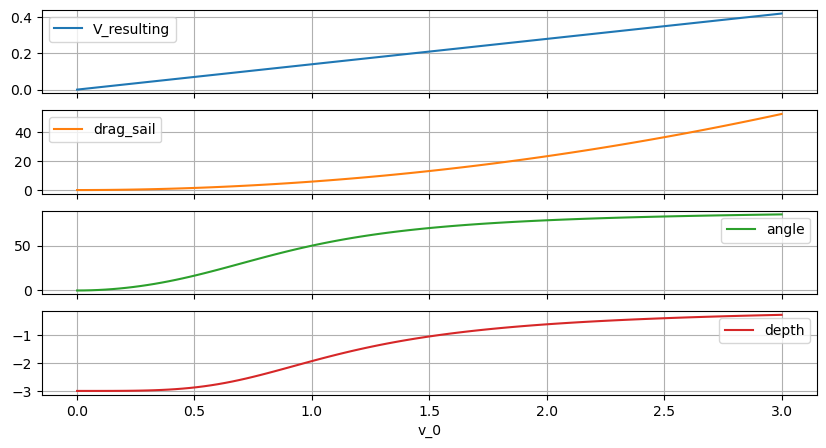

In [13]:
df.plot(subplots=True, figsize=(10, 5), grid=True);